<a href="https://colab.research.google.com/github/Nagendra24290/fruits-and-vegetables-prediction/blob/main/fv_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

data preporoessing

training


In [3]:

traning_set=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/fruits and vegetables/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)






Found 3115 files belonging to 36 classes.


validation


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits and vegetables/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 351 files belonging to 36 classes.


model


In [5]:
cnn = tf.keras.models.Sequential()

cnn layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))  ##output layer

training and compiling


In [12]:
cnn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
training_history=cnn.fit(x = traning_set, validation_data = validation_set, epochs = 30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 732ms/step - accuracy: 0.8233 - loss: 0.8909 - val_accuracy: 0.9202 - val_loss: 1.4824
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 696ms/step - accuracy: 0.8342 - loss: 1.1524 - val_accuracy: 0.9031 - val_loss: 1.4466
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 701ms/step - accuracy: 0.8238 - loss: 1.1741 - val_accuracy: 0.9316 - val_loss: 1.3799
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 676ms/step - accuracy: 0.8658 - loss: 0.9900 - val_accuracy: 0.9003 - val_loss: 1.3734
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 719ms/step - accuracy: 0.8435 - loss: 0.9611 - val_accuracy: 0.8376 - val_loss: 2.1260
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 700ms/step - accuracy: 0.8409 - loss: 1.0164 - val_accuracy: 0.9316 - val_loss: 1.3205
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 697ms/step - accuracy: 0.8579 - loss: 1.0103 - val_accuracy: 0.8917 - val_loss: 1.3783
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 704ms/step - accuracy: 0.8656 - loss: 0.7658 - val_accu

In [16]:
cnn.save('trained_model.h5')

In [17]:
training_history.history

{'accuracy': [0.8279293775558472,
  0.8382022380828857,
  0.8298555612564087,
  0.8459069132804871,
  0.841091513633728,
  0.844622790813446,
  0.8471910357475281,
  0.8520064353942871,
  0.8491171598434448,
  0.8574638962745667,
  0.8606741428375244,
  0.8600320816040039,
  0.869983971118927,
  0.8629213571548462,
  0.877046525478363,
  0.8703050017356873,
  0.8706260323524475,
  0.8642054796218872,
  0.8757624626159668,
  0.8821830153465271,
  0.8918138146400452,
  0.8895666003227234,
  0.8956661224365234,
  0.8921348452568054,
  0.8924558758735657,
  0.8956661224365234,
  0.8950240612030029,
  0.9069020748138428,
  0.903691828250885,
  0.902407705783844],
 'loss': [0.9291452169418335,
  0.9696699976921082,
  1.013864278793335,
  1.0033092498779297,
  0.9984403848648071,
  0.9490071535110474,
  1.001694679260254,
  0.8523351550102234,
  0.8840457201004028,
  0.915740966796875,
  0.9623906016349792,
  0.881979763507843,
  0.9004136919975281,
  0.9956336617469788,
  0.9094265699386597,

In [18]:
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [19]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [20]:
training_history.history['val_accuracy'][-1]*100


96.01139426231384

graph epochs

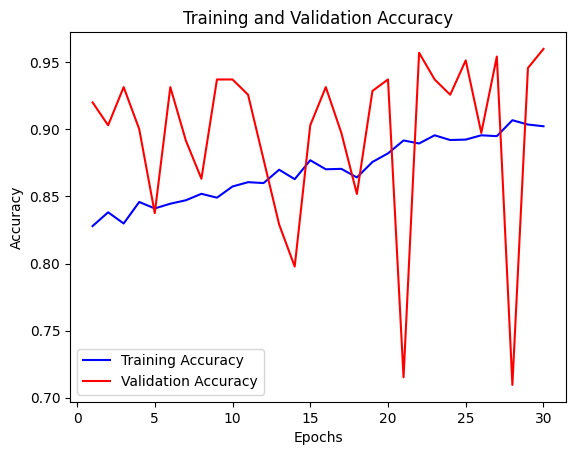

In [21]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy',color='blue')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy',color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

